In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg 

with open('./data/t10k-images.idx3-ubyte', 'rb') as f:
    magic_number = int.from_bytes(f.read(4), 'big')
    num_images = int.from_bytes(f.read(4), 'big')
    num_rows = int.from_bytes(f.read(4), 'big')
    num_cols = int.from_bytes(f.read(4), 'big')
    images = np.frombuffer(f.read(), dtype=np.uint8)
    images = images.reshape(num_images, num_rows, num_cols)

with open('./data/t10k-labels.idx1-ubyte', 'rb') as f:
    magic_number = int.from_bytes(f.read(4), 'big')
    num_labels = int.from_bytes(f.read(4), 'big')
    labels = np.frombuffer(f.read(), dtype=np.uint8)


In [2]:
arr = images[:,4:24,4:24].reshape((-1,400))
U,s,V = scipy.linalg.svd(arr)


In [3]:
zero_idxs = np.where(labels==0)[0]
one_idxs = np.where(labels==1)[0]
proj = arr@((V.T)[:,:2])

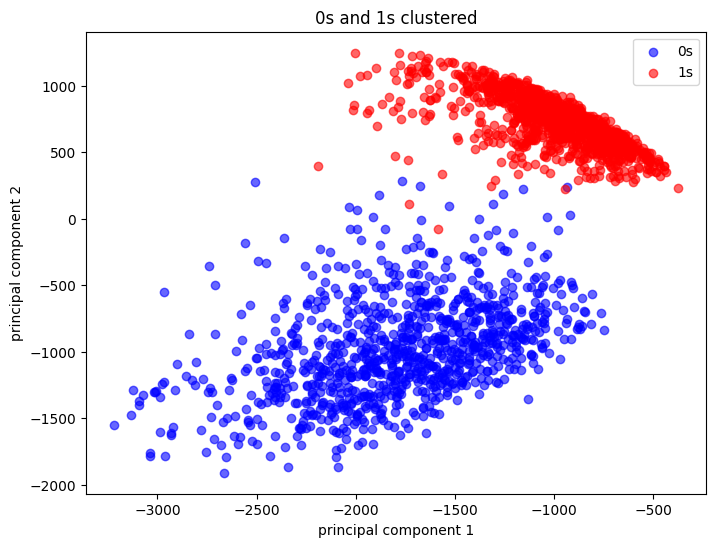

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(proj[zero_idxs, 0], proj[zero_idxs, 1], color='blue', label='0s', alpha=0.6)
plt.scatter(proj[one_idxs, 0], proj[one_idxs, 1], color='red', label='1s', alpha=0.6)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.legend()
plt.title('0s and 1s clustered')
plt.show()

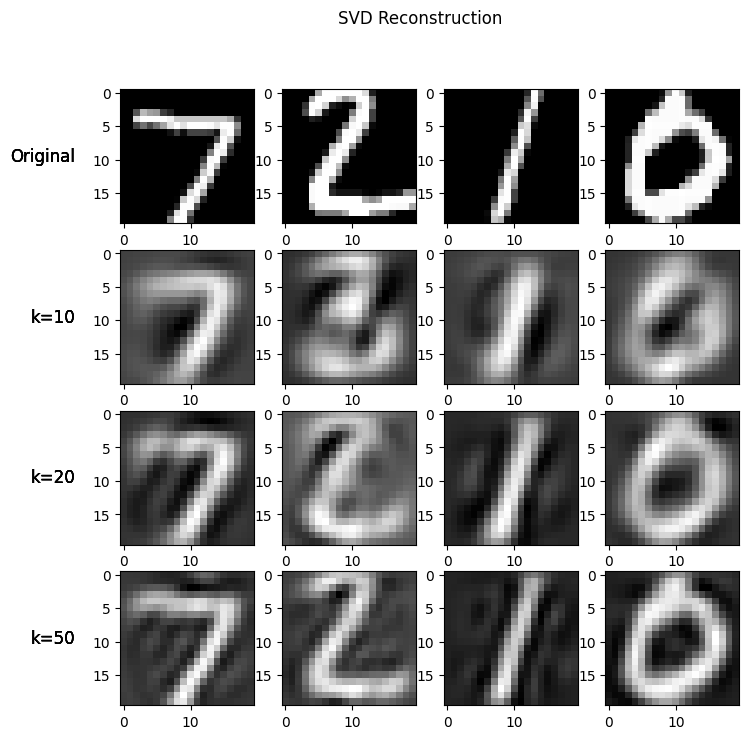

In [33]:
# k=10
def plot_rec(arr):
    
    
    fig,ax = plt.subplots(4,4,figsize=(8,8))
    fig.suptitle('SVD Reconstruction')
    
    for i in range(4):
        ax[0,i].imshow(arr[i,:].reshape((20,20)),cmap='gray')
        ax[0, 0].annotate('Original', xy=(0, 0.5), xytext=(-ax[0, 0].yaxis.labelpad - 5, 0),
                            xycoords=ax[0, 0].yaxis.label, textcoords='offset points',
                            size='large', ha='right', va='center')
        for j,k in enumerate([10,20,50]):
            arr_rec = U[:,:k]@np.diag(s[:k])@V[:k,:]

            ax[j+1,i].imshow(arr_rec[i,:].reshape((20,20)),cmap='gray')
            ax[j+1, 0].annotate(f'k={k}', xy=(0, 0.5), xytext=(-ax[j, 0].yaxis.labelpad - 5, 0),
                      xycoords=ax[j+1, 0].yaxis.label, textcoords='offset points',
                      size='large', ha='right', va='center')
    plt.show()
plot_rec(arr)
